### **Installations and dependencies**

In [ ]:
# change directory

import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Demo capstone/Summarization")

In [ ]:
# install packages (in addition to Colab pre-installed packages like torch)

!pip install aylien-apiclient
!pip install bert-extractive-summarizer
!pip install spacy==2.3.0
!pip install transformers
!pip install neuralcoref
!pip install rouge

In [ ]:
# importing packages

import nltk
nltk.download('punkt')
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rouge import Rouge 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# get the functions from the models

from summary.summarizer_aylien_model import summarizer_aylien_get
from summary.summarizer_bertext_model import summarizer_bertext_get
from summary.summarizer_tfidf_model import summarizer_tfidf_get
from summary.summarizer_textrank_model import summarizer_textrank_get, word_embeddings
from summary.summarizer_hgf_model import summarizer_hgf_get

start loading vectorization


### **Models initialization**

In [ ]:
# associate the models with the function
models = ['aylien', 'bertext', 'tfidf', 'textrank', 'hgf']
functions = [summarizer_aylien_get, summarizer_bertext_get, summarizer_tfidf_get, summarizer_textrank_get, summarizer_hgf_get]

In [ ]:
# initialize the data (from the "Create summarization.ipynb" result)
benchmark = pd.read_csv("summarized.csv").reset_index()

# initialize the rouge score
rouge = Rouge()

### **Histograms for each moel**

In [ ]:
# get rouge score
def get_score(goal, summary, metric = 'rouge-2'):
  scores = [0, 0, 0]
  cur_score = rouge.get_scores(summary, goal)[0][metric]
  scores[0] = cur_score['f']
  scores[1] = cur_score['p']
  scores[2] = cur_score['r']
  return scores

In [ ]:
# run and visualize the score distribution and 95% interval
def run_value(model_name = 'model_1', score = 'rouge-2', benchmark = benchmark, all = False):
  current_score = []
  for i in range(len(benchmark)):
    try:
        current_score.append(get_score(benchmark.Summary[i], benchmark["summarizer_" + model_name][i], score))
    except:
      pass

  # all means create an overlay histogram
  if not all:
    plt.hist(np.array(current_score).T[0], label=model_name, alpha = 0.75)
    plt.show()
  else:
    plt.hist(np.array(current_score).T[0], label=model_name, alpha = 0.7, color = colors_map[model])

  # 95% confidence interval for the f score
  return f"{np.around(np.mean(np.array(current_score), axis = 0), 2)[0]} +- {2*np.around(np.std(np.array(current_score), axis = 0), 2)[0]}"

In [ ]:
# color mapping for overlay histograms
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

colors_map = {}
for model, color in zip(models, colors):
  colors_map[model] = color

aylien results:


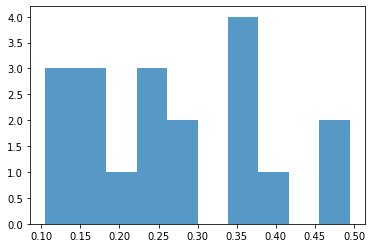

0.27 +- 0.22

bertext results:


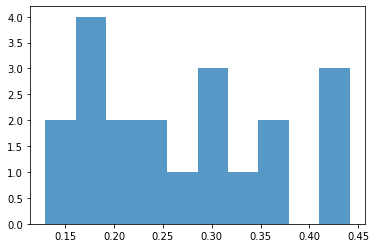

0.27 +- 0.18

tfidf results:


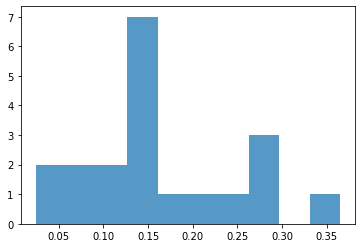

0.16 +- 0.18

textrank results:


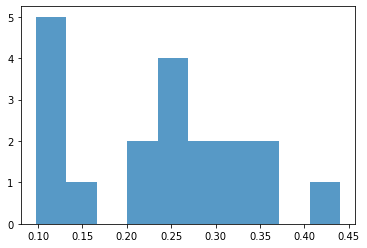

0.24 +- 0.2

hgf results:


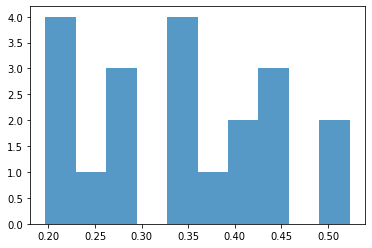

0.34 +- 0.2



In [ ]:
# rouge 1 results
for model in models:
  print(model, "results:")
  print(run_value(model, 'rouge-1', all = False))
  print("")

aylien results:


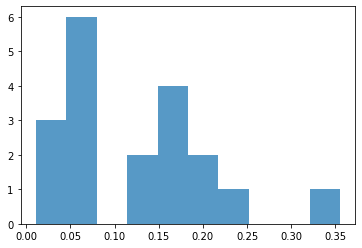

0.12 +- 0.18

bertext results:


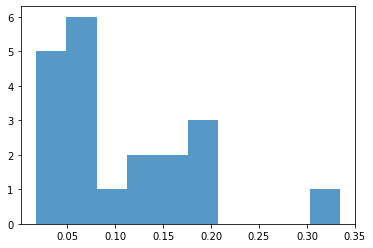

0.1 +- 0.16

tfidf results:


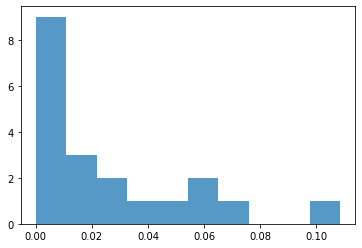

0.02 +- 0.06

textrank results:


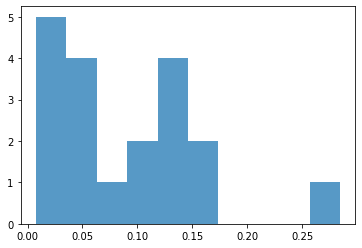

0.09 +- 0.14

hgf results:


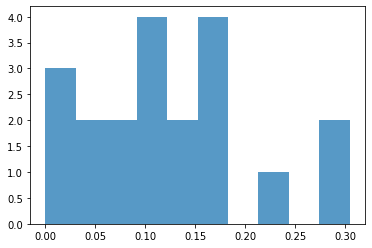

0.12 +- 0.16



In [ ]:
# rouge 2 results
for model in models:
  print(model, "results:")
  print(run_value(model, 'rouge-2', all = False))
  print("")

aylien results:


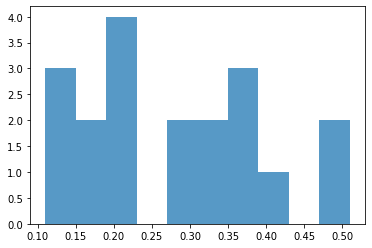

0.28 +- 0.24

bertext results:


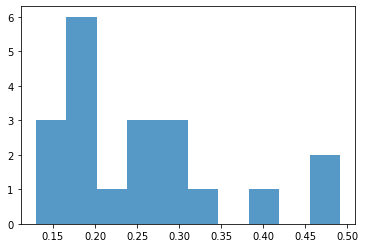

0.26 +- 0.2

tfidf results:


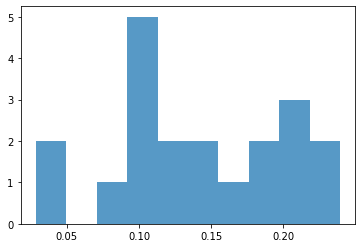

0.14 +- 0.12

textrank results:


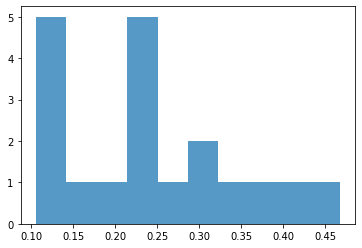

0.24 +- 0.2

hgf results:


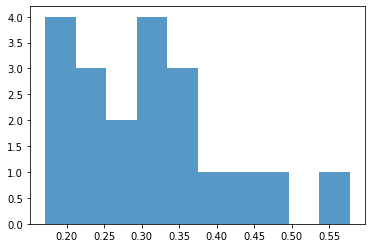

0.31 +- 0.2



In [ ]:
# rouge L results
for model in models:
  print(model, "results:")
  print(run_value(model, 'rouge-l', all = False))
  print("")

### **Half violin visualizations for the models' performance**

In [ ]:
# function to create the score for all methods and stacking them into 2 columns, score and method
def add_value(df = pd.DataFrame([], columns=["method", "score"]), model_name = 'model_1', score = 'rouge-2', benchmark = benchmark, all = False):
  current_score = []
  for i in range(len(benchmark)):
    try:
        df = df.append(pd.DataFrame([[model_name, get_score(benchmark.Summary[i], benchmark["summarizer_" + model_name][i], score)[0]]], columns = ["method", "score"]))
    except:
      pass
  return df

In [ ]:
def plot_half_vio(score = 'rouge-1'):

  # empty df to fill the score in
  df = pd.DataFrame([], columns=["method", "score"])
  for model in models:
    df = add_value(df, model, score)

  # prepare data
  df = df.append([-999,-999,-999,-999,'tfidf'])
  df['huecol'] = 0.0
  df['huecol'].iloc[-1]= -999

  # plot
  fig = plt.figure(figsize=(12,8))
  sns.violinplot(x='method', y="score",
              split=True, inner = 'quartile', hue = 'huecol',
              palette="Blues", data=df, legend = "False")
  plt.title(f'Comparison {score}')

  # remove hue legend
  leg = plt.gca().legend()
  leg.remove()
  # plt.ylim([1,5.0])
  plt.show()

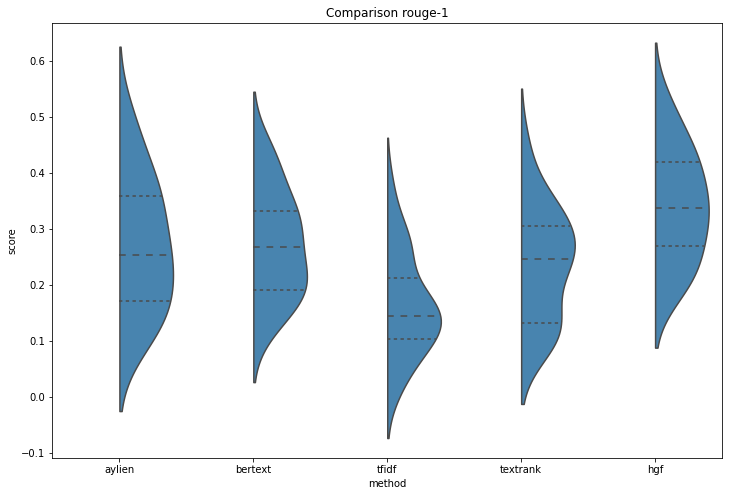

In [ ]:
plot_half_vio(score = 'rouge-1')

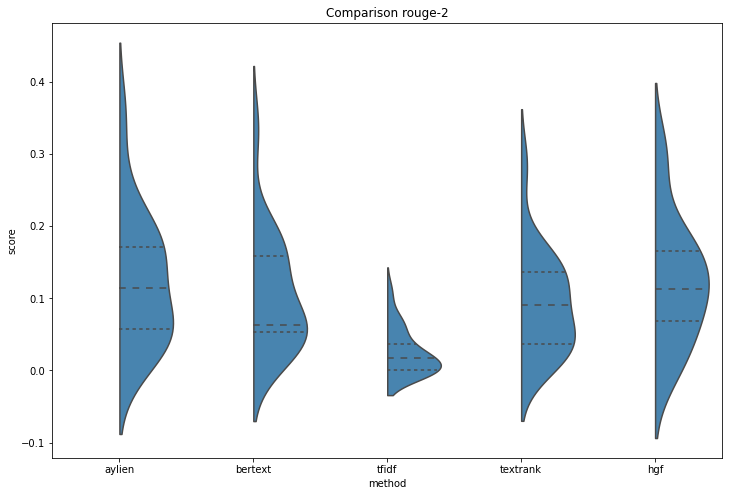

In [ ]:
plot_half_vio(score = 'rouge-2')

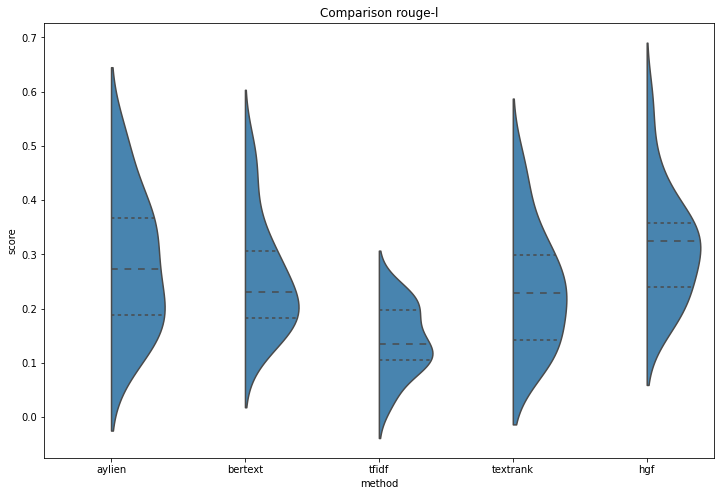

In [ ]:
plot_half_vio(score = 'rouge-l')